In [ ]:
import pandas as pd


# Use file upload function
from google.colab import files
uploaded = files.upload()

laptop_data = pd.read_csv("laptopPrice.csv")

# Display the first few rows
print("Dataset Preview:")
print(laptop_data.head())

# Summary statistics and info
print("\nDataset Info:")
print(laptop_data.info())
print("\nSummary Statistics:")
print(laptop_data.describe())





Saving laptopPrice.csv to laptopPrice.csv
Dataset Preview:
    brand processor_brand processor_name processor_gnrtn ram_gb ram_type  \
0    ASUS           Intel        Core i3            10th   4 GB     DDR4   
1  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
2  Lenovo           Intel        Core i3            10th   4 GB     DDR4   
3    ASUS           Intel        Core i5            10th   8 GB     DDR4   
4    ASUS           Intel   Celeron Dual   Not Available   4 GB     DDR4   

      ssd      hdd       os  os_bit graphic_card_gb  weight     warranty  \
0    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
1    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
2    0 GB  1024 GB  Windows  64-bit            0 GB  Casual  No warranty   
3  512 GB     0 GB  Windows  32-bit            2 GB  Casual  No warranty   
4    0 GB   512 GB  Windows  64-bit            0 GB  Casual  No warranty   

  Touchscreen msoffice  Pri

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt



# Display the first few rows
print("Dataset Preview:")
print(laptop_data.head())

# Summary statistics and info
print("\nDataset Info:")
print(laptop_data.info())
print("\nSummary Statistics:")
print(laptop_data.describe())

# Check for missing values
print("\nMissing Values:")
print(laptop_data.isnull().sum())

# Clean numerical features: Handle 'ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'weight'
numerical_columns_to_clean = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'weight']
for col in numerical_columns_to_clean:
    if col == 'weight':
        # Replace ' kg' and handle invalid entries
        laptop_data[col] = pd.to_numeric(laptop_data[col].astype(str).str.replace(' kg', ''), errors='coerce')
    else:
        # Replace ' GB' and handle invalid entries
        laptop_data[col] = pd.to_numeric(laptop_data[col].astype(str).str.replace(' GB', ''), errors='coerce')

# Fill missing or invalid values in numerical columns with the column mean
for col in numerical_columns_to_clean:
    laptop_data[col] = laptop_data[col].fillna(laptop_data[col].mean())

# Encode categorical features
categorical_features = ['brand', 'processor_brand', 'processor_name', 'ram_type', 'os']
label_encoder = LabelEncoder()
for feature in categorical_features:
    laptop_data[feature] = label_encoder.fit_transform(laptop_data[feature])

# Function to clean any ranked columns (like '10th', '11th' etc.)
def clean_ranked_column(df, col_name):
    # Extract numeric values from strings like '10th', '11th', etc.
    df[col_name] = df[col_name].astype(str).str.extract('(\d+)')  # Extract numbers only
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce')  # Coerce to numeric
    return df

# Apply the cleaning function to any column that might contain ordinal values
columns_to_clean = ['processor_name', 'ram_type']  # Adjust this list as needed
for col in columns_to_clean:
    laptop_data = clean_ranked_column(laptop_data, col)

# Check for non-numeric columns before training the model
print("\nChecking if all columns are numeric:")
for col in laptop_data.columns:
    if laptop_data[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric values:")
        print(laptop_data[col].unique())  # This will print unique non-numeric values
        laptop_data[col] = pd.to_numeric(laptop_data[col], errors='coerce')  # Force conversion to numeric

# Check if any columns still have non-numeric values
for col in laptop_data.columns:
    if laptop_data[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric values after cleaning:")
        print(laptop_data[col].unique())

# Display the cleaned dataset
print("\nCleaned Dataset Sample:")
print(laptop_data.head())

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'weight']
laptop_data[numerical_features] = scaler.fit_transform(laptop_data[numerical_features])

# Display the processed data
print("\nProcessed Data Sample:")
print(laptop_data.head())

# Split the dataset into features (X) and target (y)
X = laptop_data.drop(columns=['Price'])  # Exclude 'Price' column as features
y = laptop_data['Price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all columns in X_train are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check if any columns still have non-numeric values
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric values after cleaning:")
        print(X_train[col].unique())

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
cross_val_rmse = np.mean(np.sqrt(-cross_val_score(rf_model, X, y, scoring="neg_mean_squared_error", cv=5)))




Dataset Preview:
   brand  processor_brand  processor_name  processor_gnrtn    ram_gb  \
0      1                1               1              NaN -1.071099   
1      5                1               1              NaN -1.071099   
2      5                1               1              NaN -1.071099   
3      1                1               2              NaN -0.155715   
4      1                1               0              NaN -1.071099   

   ram_type       ssd       hdd  os  os_bit  graphic_card_gb  weight  \
0         1 -1.428639  1.930290   2     NaN        -0.587838     NaN   
1         1 -1.428639  1.930290   2     NaN        -0.587838     NaN   
2         1 -1.428639  1.930290   2     NaN        -0.587838     NaN   
3         1  0.189207 -0.550005   2     NaN         0.399490     NaN   
4         1 -1.428639  0.690143   2     NaN        -0.587838     NaN   

   warranty  Touchscreen  msoffice  Price  rating  Number of Ratings  \
0       NaN            0         0  34649    

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Model Performance:
Mean Absolute Error (MAE): 12286.721198989899
Root Mean Squared Error (RMSE): 23312.51684490002
Cross-Validation RMSE: 29874.03

Feature Importance:
              Feature  Importance
6                 ssd    0.470572
2      processor_name    0.143795
8                  os    0.063632
10    graphic_card_gb    0.060323
16  Number of Ratings    0.054811
4              ram_gb    0.046744
0               brand    0.044387
5            ram_type    0.031170
1     processor_brand    0.023744
17  Number of Reviews    0.020869
13        Touchscreen    0.019828
14           msoffice    0.014685
7                 hdd    0.005439
11             weight    0.000000
12           warranty    0.000000
15             rating    0.000000
3     processor_gnrtn    0.000000
9              os_bit    0.000000


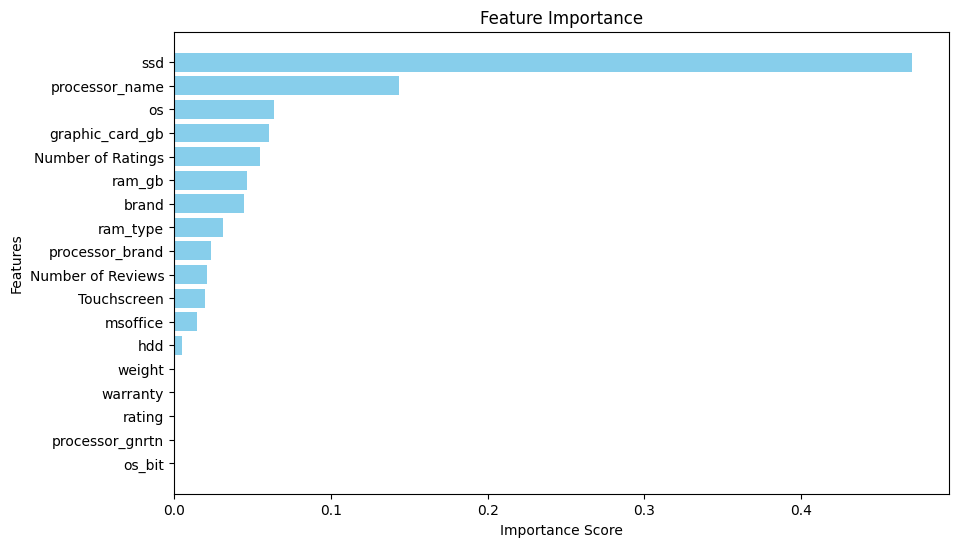

In [ ]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Cross-Validation RMSE: {cross_val_rmse:.2f}")

# Feature importance
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()